In [1]:
import pandas as pd
import sys
sys.path.append("../")
from src import soporte_clustering as sc


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/Global_Superstore.csv', encoding='ISO-8859-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
GestorExploracion = sc.Exploracion(df)

In [5]:
GestorExploracion.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
11749,50117,AG-2011-8180,25-02-2011,25-02-2011,Same Day,RO-9780,Rose O'Brian,Consumer,Algiers,Alger,...,OFF-SAN-10001681,Office Supplies,Paper,"SanDisk Computer Printout Paper, 8.5 x 11",339.30000,10,0.000,37.20000,27.29,Critical
7999,26214,IN-2014-70493,23-10-2014,26-10-2014,Second Class,TZ-21445,Tom Zandusky,Corporate,Luoyang,Guangdong,...,FUR-CH-10001756,Furniture,Chairs,"Novimex Bag Chairs, Adjustable",145.35000,3,0.000,62.46000,42.37,Critical
50738,31889,CA-2011-135405,10-01-2011,14-01-2011,Standard Class,MS-17830,Melanie Seite,Consumer,Laredo,Texas,...,OFF-AR-10004078,Office Supplies,Art,Newell 312,9.34400,2,0.200,1.16800,0.21,Medium
46902,20617,ID-2012-59384,10-08-2012,16-08-2012,Standard Class,LP-17080,Liz Pelletier,Consumer,Jakarta,Jakarta,...,OFF-PA-10003020,Office Supplies,Paper,"Xerox Message Books, Premium",21.59220,2,0.470,-13.44780,0.91,Medium
18569,5205,MX-2011-100587,26-09-2011,01-10-2011,Second Class,SC-20050,Sample Company A,Home Office,Bogotá,Bogota,...,TEC-CO-10001968,Technology,Copiers,"Sharp Ink, High-Speed",163.15304,2,0.002,11.11304,14.18,Medium




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
                  ..
ID-2014-68085      1
ID-2012-85221      1
CA-2012-119697     1
CA-2011-151967     1
MX-2012-134460     1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
Order Date
1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


In [6]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [7]:
df.drop(columns=['Row ID','Postal Code','Customer ID','Customer Name','Ship Date','Order ID'],inplace=True)

In [8]:
df.columns

Index(['Order Date', 'Ship Mode', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
GestorExploracion.explorar_datos()

5 registros aleatorios:


,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
39473,24-08-2011,Standard Class,Corporate,Baghdad,Baghdad,Iraq,EMEA,EMEA,OFF-TEN-10001031,Office Supplies,Storage,"Tenex Shelving, Single Width",54.690,1,0.0,13.650,2.37,Medium
1088,31-12-2013,First Class,Consumer,Rome,Lazio,Italy,EU,South,TEC-CO-10002240,Technology,Copiers,"Canon Copy Machine, High-Speed",781.020,3,0.0,140.580,193.57,High
26037,31-10-2013,First Class,Home Office,Granada,Granada,Nicaragua,LATAM,Central,OFF-SU-10004119,Office Supplies,Supplies,"Acme Trimmer, Steel",58.640,2,0.0,23.440,7.57,High
42017,23-04-2014,Standard Class,Consumer,Gold Coast,Queensland,Australia,APAC,Oceania,OFF-EN-10002034,Office Supplies,Envelopes,"Ames Peel and Seal, with clear poly window",26.676,2,0.4,-6.264,1.81,Medium
8342,16-04-2013,First Class,Consumer,Colombo,Parana,Brazil,LATAM,South,TEC-PH-10003312,Technology,Phones,"Cisco Office Telephone, VoIP",429.600,8,0.0,176.000,40.49,High




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Mode       51290 non-null  object 
 2   Segment         51290 non-null  object 
 3   City            51290 non-null  object 
 4   State           51290 non-null  object 
 5   Country         51290 non-null  object 
 6   Market          51290 non-null  object 
 7   Region          51290 non-null  object 
 8   Product ID      51290 non-null  object 
 9   Category        51290 non-null  object 
 10  Sub-Category    51290 non-null  object 
 11  Product Name    51290 non-null  object 
 12  Sales           51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Discount        51290 non-null  float64
 15  Profit          51290 non-null  float64
 16  Shipping Cost   51290 non-null  float64

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order Date,51290,1430,18-06-2014,135
Ship Mode,51290,4,Standard Class,30775
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51290,13,Central,11117
Product ID,51290,10292,OFF-AR-10003651,35
Category,51290,3,Office Supplies,31273




Número de valores nulos por columna:
Order Date        0
Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


Distribución de valores categóricos:

Columna: Order Date
Order Date
18-06-2014    135
18-11-2014    127
03-09-2014    126
20-11-2014    118
29-12-2014    116
             ... 
07-10-2012      1
16-01-2011      1
27-02-2011      1
21-10-2012      1
06-02-2011      1
Name: count, Length: 1430, dtype: int64

Columna: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Columna: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Columna: Ci

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


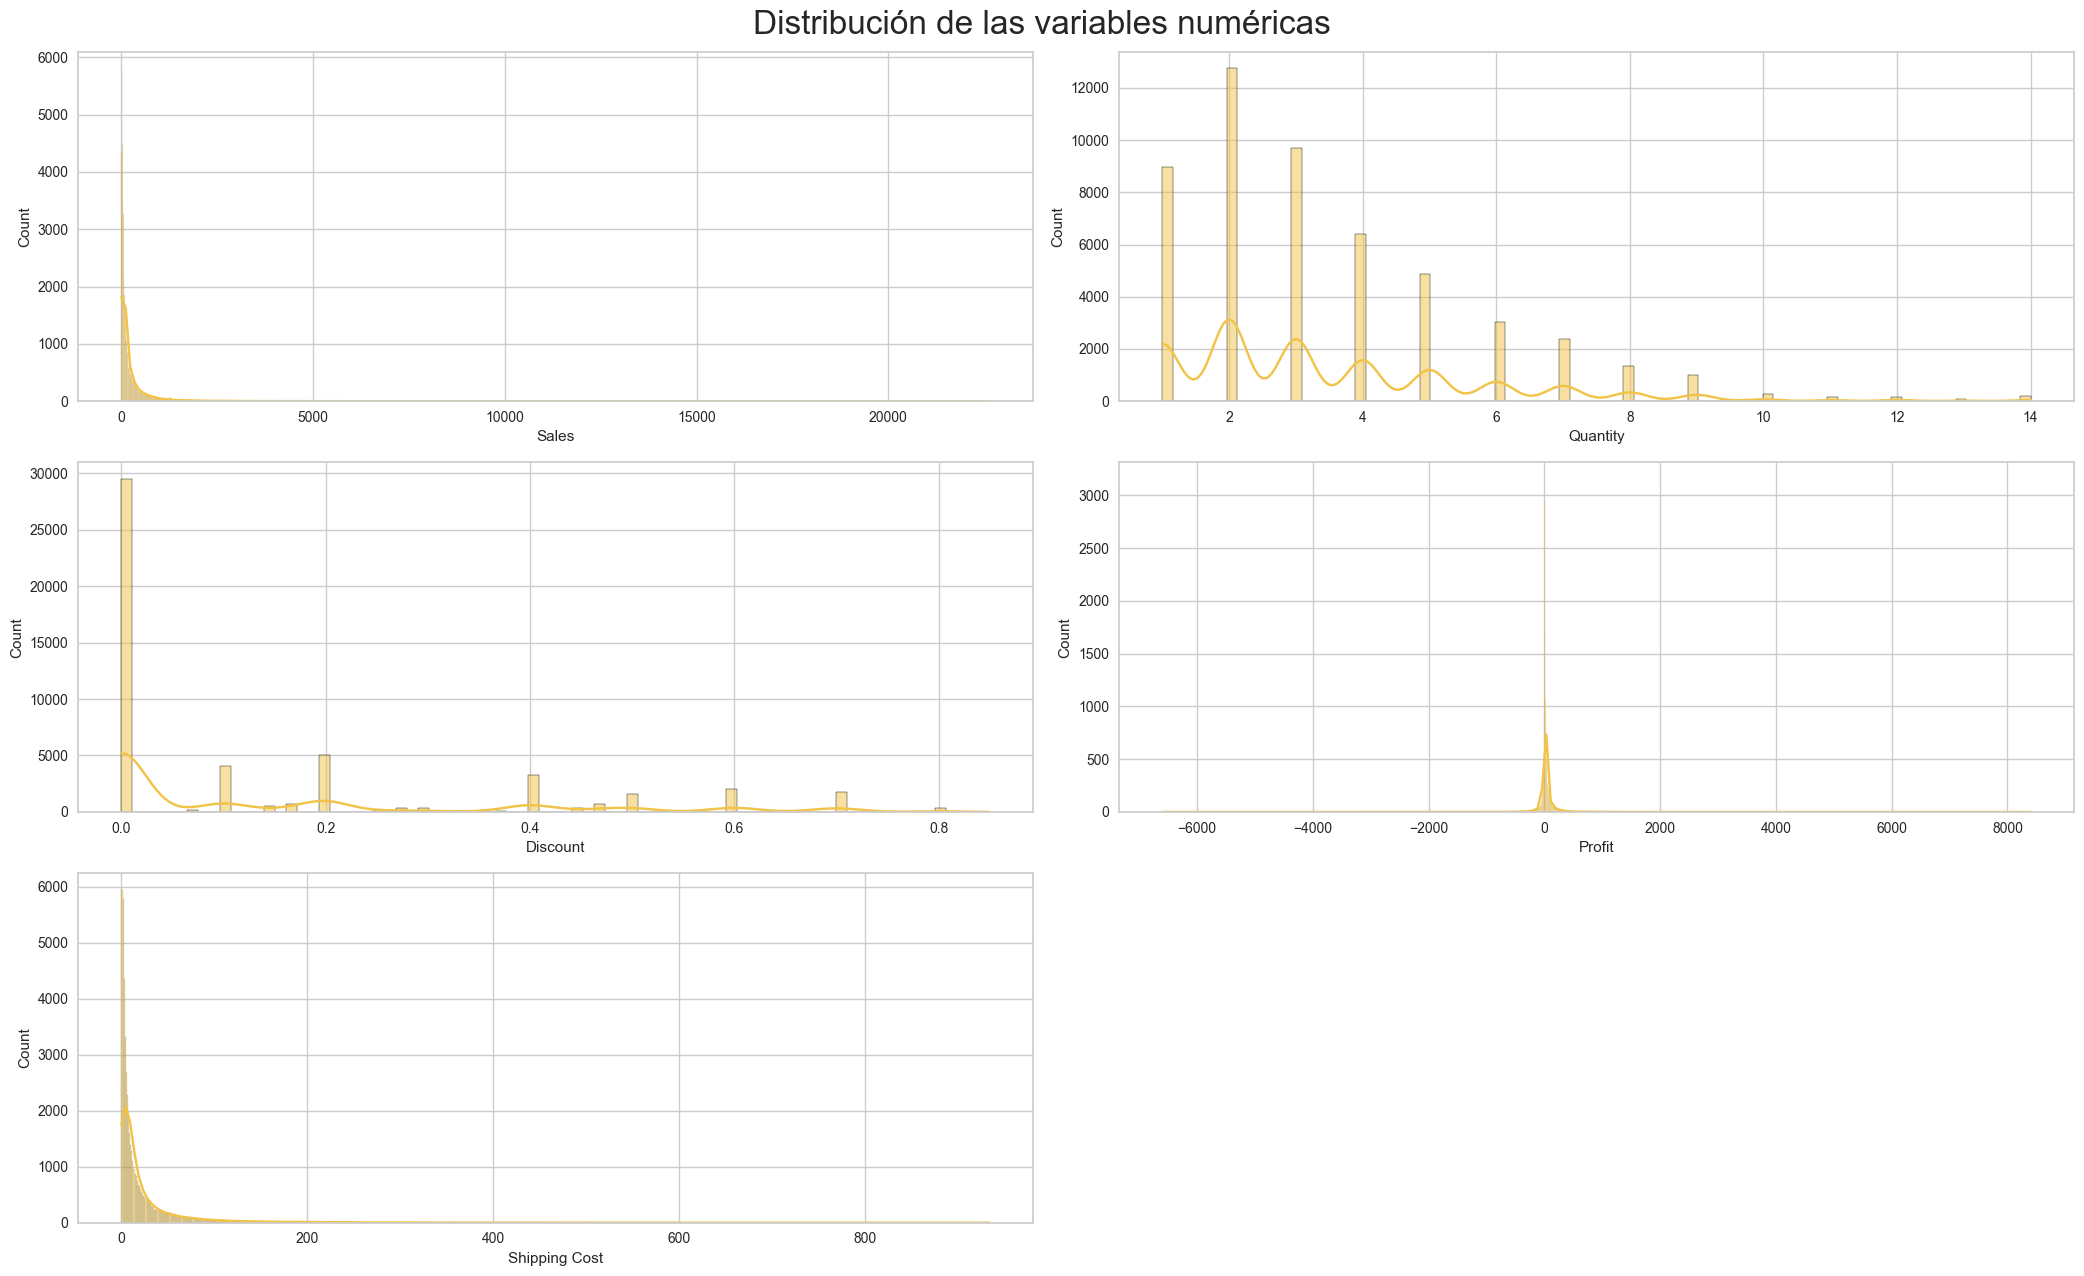

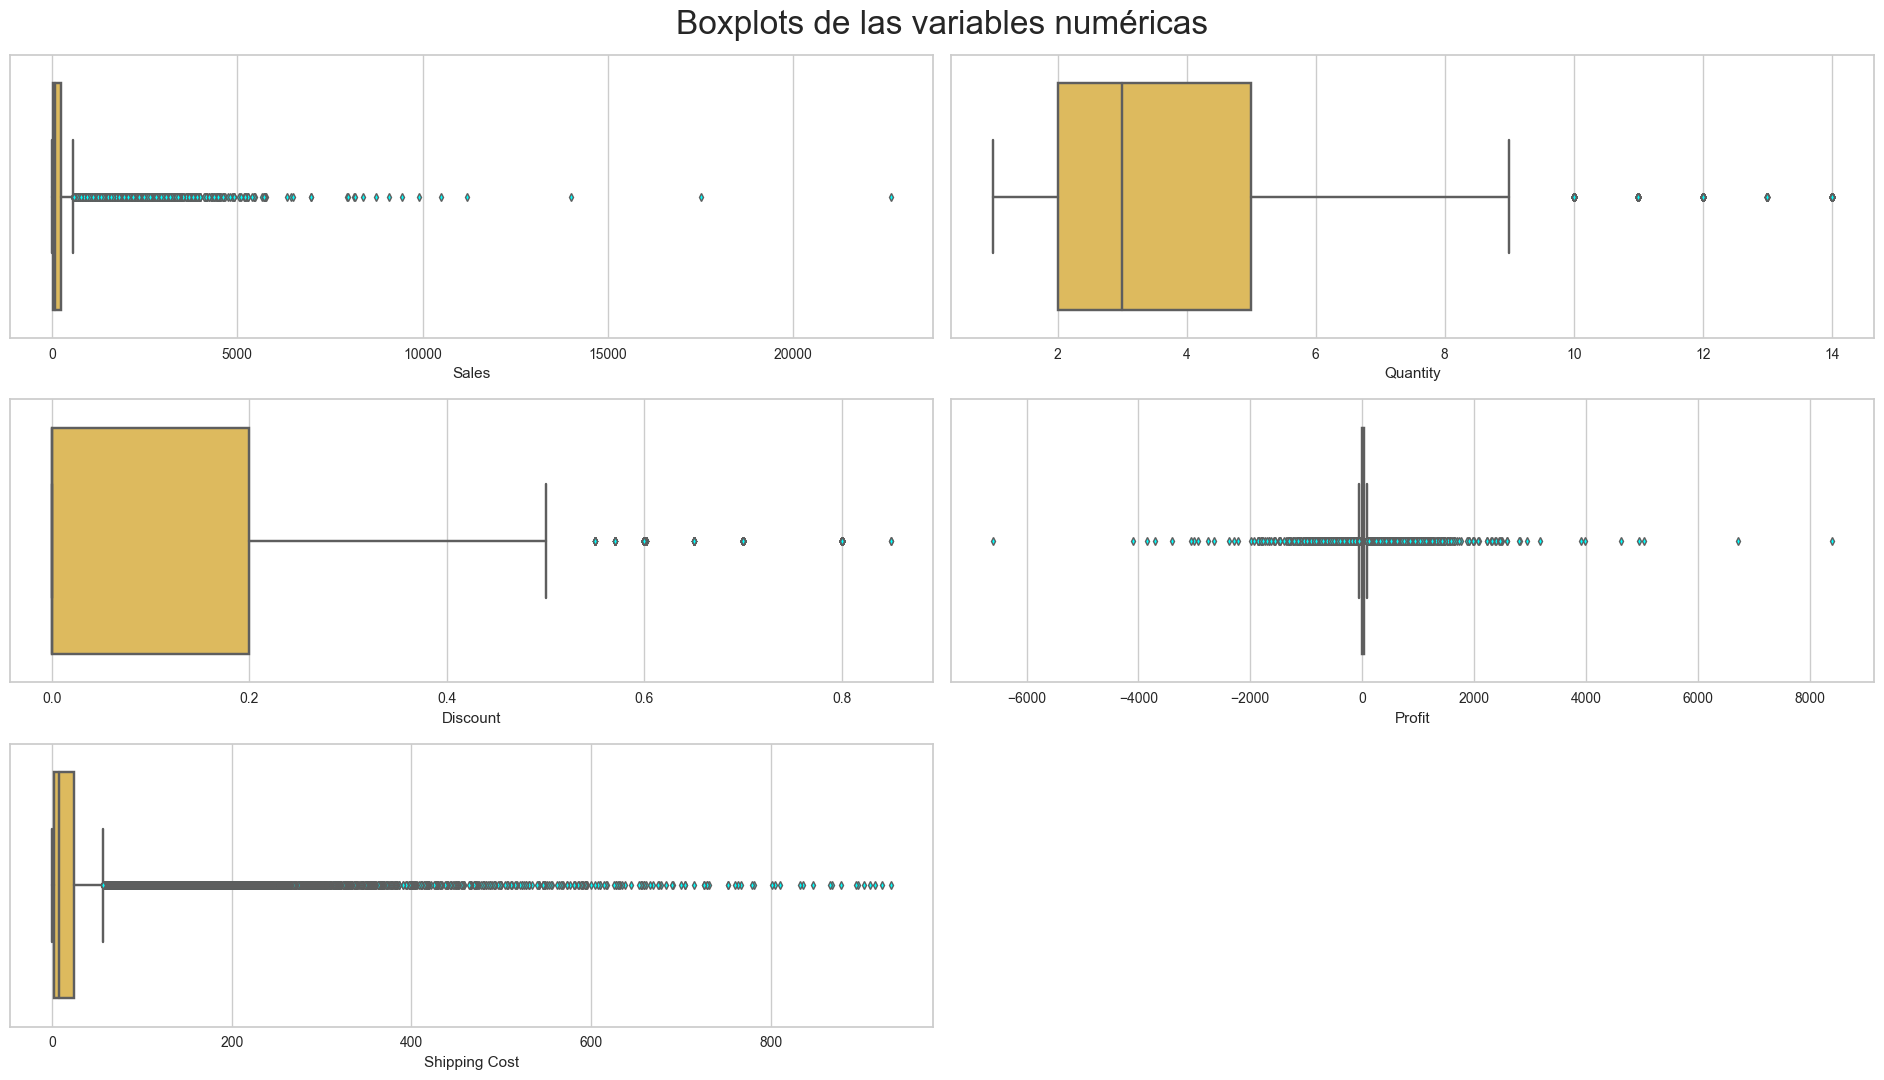

In [10]:
GestorExploracion.visualizar_numericas()

In [11]:
df["Discount"].sort_values(ascending=False)

13251    0.85
5321     0.85
17118    0.80
47760    0.80
51064    0.80
         ... 
22280    0.00
22282    0.00
22283    0.00
22284    0.00
51289    0.00
Name: Discount, Length: 51290, dtype: float64

In [12]:
df["Discount"].value_counts()

Discount
0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.150      541
0.002      461
0.270      388
0.300      340
0.450      327
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
Name: count, dtype: int64

> Tras observar los Outliers, decido manetenerlos en una primera instancia ya que parecen ser valores reales, a pesar de que sean outliers

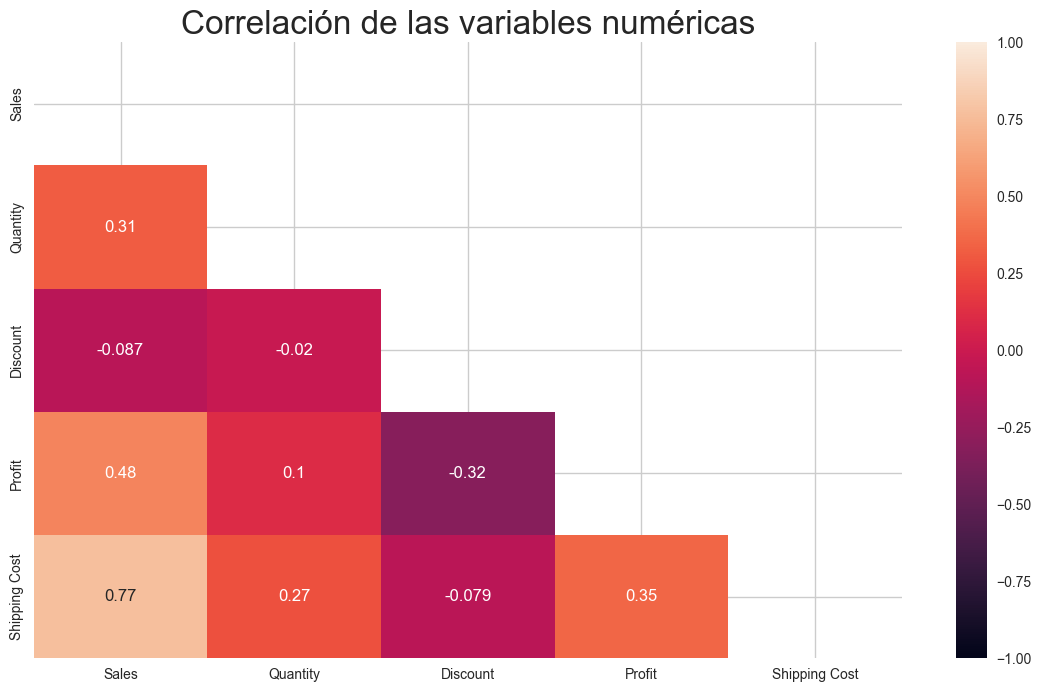

In [13]:
GestorExploracion.correlacion()

In [14]:
GestorPreprocesar = sc.Preprocesado(df)

In [15]:
GestorPreprocesar.estandarizar()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,4.231596,1.546227,-0.673210,4.207735,15.833395,Critical
1,05-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",7.102511,2.423903,-0.202129,-1.820450,15.659911,Critical
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",10.108857,2.423903,-0.202129,5.112790,15.517842,Medium
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",5.427057,0.668550,-0.202129,-0.717859,15.424817,Medium
4,05-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",5.304919,1.985065,-0.673210,1.622750,15.300550,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,19-06-2014,Same Day,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",-0.372037,0.668550,-0.673210,-0.138299,-0.460168,Medium
51286,20-06-2014,Standard Class,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,-0.504648,-1.086803,3.095436,-0.170478,-0.460168,Medium
51287,02-12-2013,Same Day,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",-0.458549,-0.209126,-0.673210,-0.099692,-0.460168,High
51288,18-02-2012,Standard Class,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",-0.477993,-0.647964,-0.673210,-0.150345,-0.460343,Medium


In [16]:
GestorPreprocesar.codificar()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.000565,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662
1,0.000858,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662
2,0.000565,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855
3,0.000702,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855
4,0.001228,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000994,0.052661,0.300819,0.000078,0.000117,0.004874,0.214506,0.045584,0.000097,0.609729,0.047183,0.000351,-0.372037,0.668550,-0.673210,-0.138299,-0.460168,0.573855
51286,0.001053,0.600019,0.517021,0.007350,0.019205,0.194853,0.194853,0.216748,0.000078,0.609729,0.034217,0.000078,-0.504648,-1.086803,3.095436,-0.170478,-0.460168,0.573855
51287,0.001189,0.052661,0.182160,0.000175,0.039013,0.194853,0.194853,0.062449,0.000156,0.609729,0.047475,0.000156,-0.458549,-0.209126,-0.673210,-0.099692,-0.460168,0.302223
51288,0.000429,0.600019,0.182160,0.000175,0.007974,0.031176,0.200702,0.129557,0.000175,0.609729,0.119945,0.000702,-0.477993,-0.647964,-0.673210,-0.150345,-0.460343,0.573855


In [21]:
df_orig = pd.read_csv('../data/raw/Global_Superstore.csv', encoding='ISO-8859-1')
df_orig.shape[0]
df["Profit_respuesta"] = df_orig["Profit"]
df.drop(columns=["Profit"], inplace=True)

In [23]:
df.to_csv("../data/cooked/datos_preprocesamiento.csv")